In [1]:
%matplotlib inline

In [2]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [5, 5],
'axes.labelsize': 16,
'axes.titlesize':18,
'font.size': 16,
'legend.fontsize': 10,
'xtick.labelsize': 12,
'ytick.labelsize': 12
}
plt.rcParams.update(params)
# plt.style.use('seaborn-notebook')

In [4]:
data1 = ss.norm.rvs(loc=0, scale=0.50, size = 2000, random_state=None)
data2 = ss.norm.rvs(loc=0, scale=0.50, size = 2000, random_state=None)

data = np.array([[data1[i], data2[i]] for i in range(data1.shape[0])])

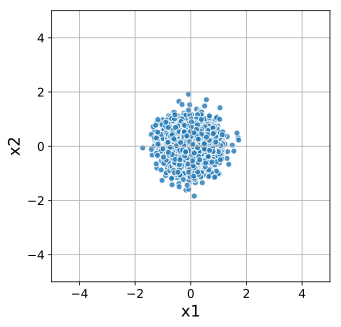

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(data[:, 0], data[:, 1], edgecolors='w', alpha=0.8)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('bss_whitening_gaussian.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [6]:
a1 = 0.3
a2 = 0.9

obs_data = np.array([[a1 * data1[i] + a2 * data2[i], 
                      a2 * data1[i] + a1 * data2[i]] for i in range(data1.shape[0])])

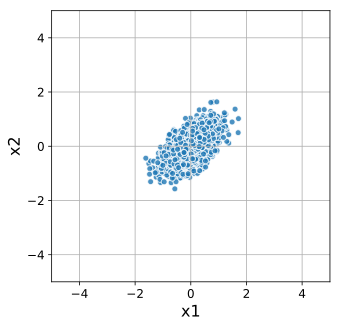

In [7]:
plt.figure(figsize=(5, 5))
plt.scatter(obs_data[:, 0], obs_data[:, 1], edgecolors='w', alpha=0.8)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('bss_whitening_gaussian_mixture.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [8]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)

whitened_obs_data = pca.fit_transform(obs_data)

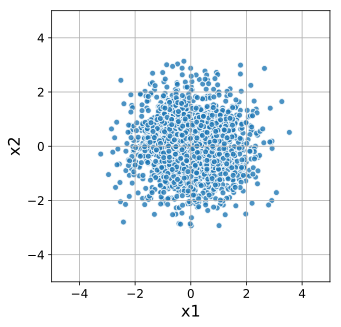

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(whitened_obs_data[:, 0], whitened_obs_data[:, 1], edgecolors='w', alpha=0.8)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('bss_whitening_gaussian_mixture_whitened.pdf', format='pdf', bbox_inches='tight')
plt.show()